# Regresión Logística

**algoritmo de clasificación**, se usa cuando la variable dependiente no es un número, sino otra cosa (como un Sí / No respuesta).

Es un **algoritmo de clasificación** que se utiliza para predecir la probabilidad de una **variable dependiente categórica**. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 – 0, sí – no, abierto – cerrado, etc. se utiliza para estimar la probabilidad de una respuesta binaria basada en una o más variables predictoras o independientes.
Es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores.

El algoritmo de Regresión Logística se utiliza para proyectos de clasificación, si queremos conocer si una persona vive o no el naufragio del Titanic, o si una acción de la bolsa de valores va a subir o no.

## 1. Importación de paquetes y dataset

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

In [66]:
names = names.split(' ')

In [67]:
df = pd.read_csv('data/hypothyroid.csv',index_col=False,names=names,na_values=['?'])

In [68]:
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [69]:
df.shape

(3163, 26)

## 2. Preprocessing

### 2.1. Borrado de columnas innecesarias

In [70]:
to_drop=[]
for c in df.columns:
    if 'measured' in c or 'query' in c:
        to_drop.append(c)

In [71]:
to_drop

['query_on_thyroxine',
 'query_hypothyroid',
 'query_hyperthyroid',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [72]:
to_drop.append('TBG')

In [73]:
df.drop(to_drop,axis=1,inplace=True)

In [74]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


Consultamos los valores estadísticos básicos de cada columna. Si añadimos .T a la función 'describe' podemos transponer la matriz resultado y ayuda a la comprensión de dichos valores.

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2717.0,51.154214,19.294405,1.0,35.00,54.00,67.000,98.00
TSH,2695.0,5.923180,23.899467,0.0,0.00,0.70,2.300,530.00
T3,2468.0,1.939749,0.996773,0.0,1.40,1.80,2.300,10.20
TT4,2914.0,108.850000,45.485419,2.0,83.00,104.00,128.000,450.00
T4U,2915.0,0.978199,0.226580,0.0,0.85,0.96,1.065,2.21
FTI,2916.0,115.397771,60.239572,0.0,91.00,107.00,129.000,881.00


### 2.2. Tratamiento de missing values
La función `df.isna()` retorna un dataframe de valores booleanos (true para indicar la existencia de valor y false para valores missing). Si añadimos la función sum se verán y calcularán el número de missing values para cada columna.

In [76]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

En este caso borraremos las filas con valores missing gracias la función `df.dropna()`

In [77]:
df.dropna(inplace=True)

In [78]:
df.shape
df['response'].unique()

array(['hypothyroid', 'negative'], dtype=object)

### 2.3. Transformación de datos categóricos manualmente

La columna response contiene los valores 'hypothyroid' para indicar que el paciente sufre hipertiroidismo y 'negative' para indicar que no. Los sustituiremos manualmente por valores numéricos.

In [79]:
def class_convert(response):
    if response=='hypothyroid':
        return 1
    else:
        return 0

In [80]:
df['response']=df['response'].apply(class_convert)

In [81]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [82]:
df.columns

Index(['response', 'age', 'sex', 'on_thyroxine', 'antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

## 3. Visual EDA

### 3.1. Diagrama de cajas

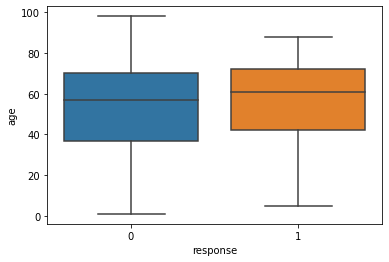

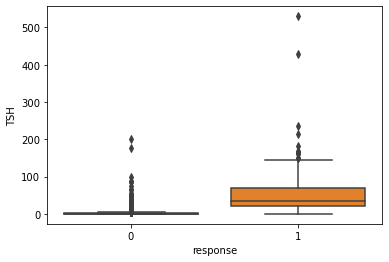

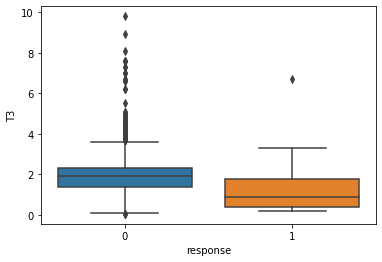

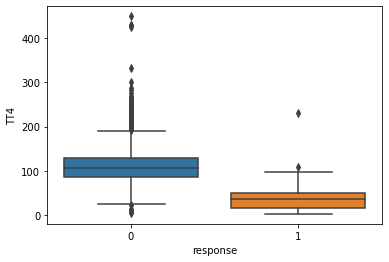

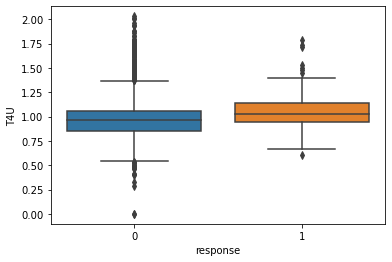

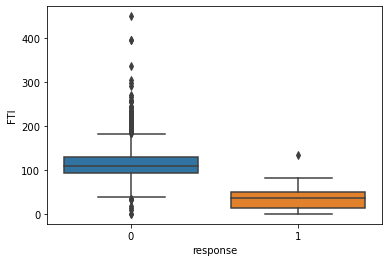

In [83]:
for var in ['age','TSH','T3','TT4','T4U','FTI']:
    sns.boxplot(x='response',y=var,data=df)
    plt.show()

### 3.2. Análisis de correlaciones entre variables independendientes

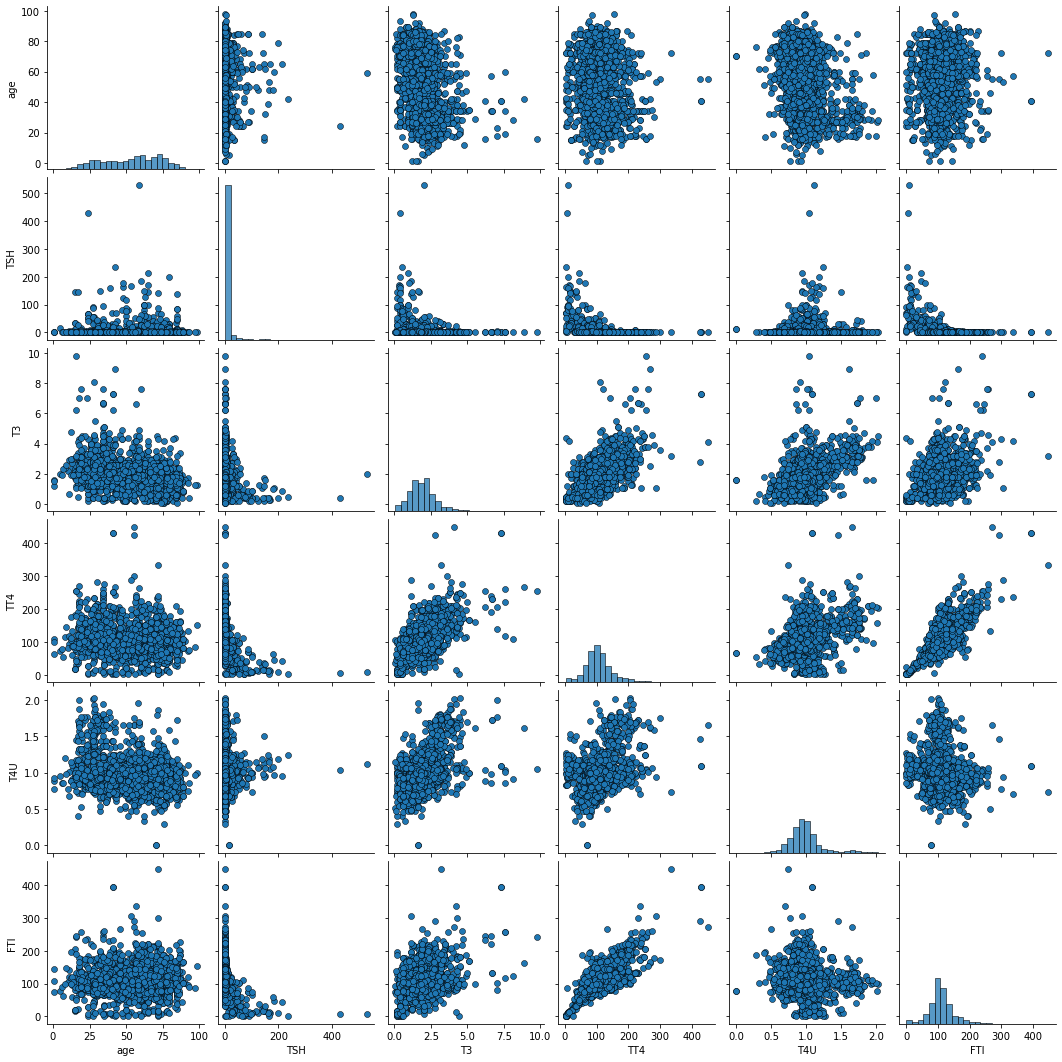

In [84]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

### 3.3. Transformación de datos categóricos con get_dummies

In [85]:
df_dummies = pd.get_dummies(data=df)

In [86]:
df_dummies.shape

(2000, 25)

In [87]:
df_dummies.sample(10)

,response,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
138,1,15.0,35.0,2.0,19.0,0.95,20.0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1212,0,76.0,3.2,0.8,101.0,0.99,103.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1169,0,28.0,0.9,4.5,204.0,2.03,100.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2842,0,27.0,2.2,2.1,103.0,1.09,94.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1461,0,33.0,1.0,1.8,83.0,0.77,108.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1249,0,69.0,0.5,1.7,123.0,0.86,144.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2519,0,65.0,0.0,2.2,112.0,1.05,107.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3043,0,72.0,0.0,2.3,91.0,0.99,92.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
664,0,44.0,1.4,1.8,107.0,0.74,144.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
2204,0,70.0,0.0,2.3,121.0,0.88,138.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0


## 4. División del dataset

La variable X contendrá todas las columnas a excepción de response.
La variable y contendrá exclusivamente la columna response.

In [88]:
from sklearn.model_selection import train_test_split
X = df_dummies.drop('response',axis=1)
y = df_dummies['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [89]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (1400, 24)
Test set shape (600, 24)


## 5. Creación del modelo de Regresión Logística

Se implementará la regresión logística con el método de Newton(por defecto) y regularización Ridge L2(por defecto). [Aquí](https://www.iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/) más información sobre los tipos de regularizaciones.

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
clf1 = LogisticRegression(penalty='l2',solver='newton-cg')

## 6. Entrenamiento

In [92]:
clf1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

## 7. Cálculo de intercept, coefficients y score

In [93]:
clf1.intercept_

array([2.28502184])

In [94]:
clf1.coef_

array([[ 0.02031894,  0.01861482, -0.32521557,  0.00395534,  0.30699785,
        -0.10796204,  0.30204842, -0.30203549,  0.89773271, -0.89771979,
         0.62688011, -0.62686718, -0.67442561,  0.67443854,  0.13429458,
        -0.13428166,  0.2731325 , -0.27311958,  0.26138881, -0.26137589,
         0.08933392, -0.089321  , -0.24898605,  0.24899898]])

In [121]:
clf1.score(X_test,y_test)

0.8022388059701493

## 8. Predicciones

Para las regresiones logísticas, el método `predict_proba` estima la probabilidad de ser de tipo 0 (NO) y la probabilidad de ser de tipo 1(YES).

In [96]:
prob_threshold = 0.5

In [97]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:100]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.990471,9.528526e-03,0
1,0.998714,1.285686e-03,0
2,0.999999,1.098157e-06,0
3,0.624016,3.759837e-01,0
4,0.999296,7.043617e-04,0
...,...,...,...
95,0.997241,2.758653e-03,0
96,0.997120,2.879509e-03,0
97,0.999999,7.347352e-07,0
98,0.999971,2.871679e-05,0


In [98]:
y_test[:10]

2944    0
511     0
2116    0
1412    0
2039    0
2013    0
1478    0
2744    0
83      1
2100    0
Name: response, dtype: int64

## 9. Informe de classificación (classification report) y matriz de confusión (confusion matrix)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.86      0.77      0.81        31

    accuracy                           0.98       600
   macro avg       0.92      0.88      0.90       600
weighted avg       0.98      0.98      0.98       600



## Ejercicio: Titanic

1. Carga_ Toma como base el fichero titanic_train.csv y cárgalo.
2. Visual EDA:
   ¿Exiset algún patrón de supervivencia basado en el sexo?
   Crea el siguiente gráfico: sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
    ¿Y basado en el clase de los pasajeros (pclass)?
    Crea un histograma que represente la edad de los pasajeros.
    Contrasta la clase respecto a la edad.
3. Preprocessing:
    Sustituye los missing values de la edad por el valor medio.
    Suprime columnas innecesarias.
    Convierte columnas categóricas por variables dummies
4. Creación modelo de regresión logística
5. Entrenamiento
6. Cálculo de probabilidades.

In [101]:
df_titacnic_train = pd.read_csv("data/titanic_train.csv")
df_titacnic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

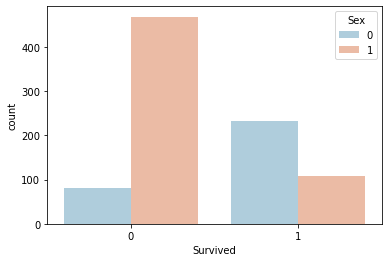

In [102]:
def class_convert(sex):
    if sex=="male":
        return 1
    else:
        return 0
df_titacnic_train['Sex']=df_titacnic_train['Sex'].apply(class_convert)
sns.countplot(x='Survived',hue='Sex',data=df_titacnic_train,palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

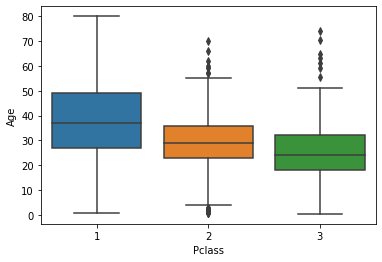

In [103]:
sns.boxplot(x='Pclass',y='Age',data=df_titacnic_train)

In [104]:
df_titacnic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df_titacnic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [106]:
df_titacnic_train_aux = df_titacnic_train.fillna(df_titacnic_train["Age"].mean())
df_titacnic_train_aux

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [107]:
df_titacnic_train_aux.drop("Name", axis=1,inplace=True)
df_titacnic_train_aux.drop("PassengerId", axis=1,inplace=True)
df_titacnic_train_aux.drop("Ticket", axis=1,inplace=True)
df_titacnic_train_aux.drop("Cabin", axis=1,inplace=True)

In [108]:
df_titacnic_train_dummies = pd.get_dummies(data=df_titacnic_train_aux)
df_titacnic_train_dummies

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_29.69911764705882,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,0,1
1,1,1,0,38.000000,1,0,71.2833,0,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,0,1
889,1,1,1,26.000000,0,0,30.0000,0,1,0,0


In [109]:
from sklearn.model_selection import train_test_split
X = df_titacnic_train_dummies[["Sex", "Pclass", "Age"]]
y = df_titacnic_train_dummies['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [110]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (623, 3)
Test set shape (268, 3)


In [111]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(penalty='l2',solver='newton-cg')

In [112]:
clf1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [113]:
clf1.intercept_

array([4.11219416])

In [114]:
clf1.coef_

array([[-2.39207042, -1.01722108, -0.02913634]])

In [115]:
clf1.score(X_test,y_test)

0.8022388059701493

In [116]:
prob_threshold = 0.5

In [117]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:50]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.899967,0.100033,0
1,0.771631,0.228369,0
2,0.871498,0.128502,0
3,0.129777,0.870223,1
4,0.342399,0.657601,1
5,0.088070,0.911930,1
6,0.451353,0.548647,1
7,0.857871,0.142129,0
8,0.355638,0.644362,1
9,0.073008,0.926992,1


In [118]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

